## 1. Import Required Libraries

# Task 2: Customer Segmentation Using K-Means Clustering

## Objective
Build and evaluate customer segmentation models using unsupervised learning techniques to identify distinct customer groups based on income and spending behavior.

**Key Goals:**
1. Data Exploration
2. Data Preprocessing & Scaling
3. Optimal Cluster Detection (Elbow Method)
4. K-Means Clustering
5. Cluster Visualization
6. Cluster Analysis
7. BONUS: DBSCAN Alternative
8. BONUS: Spending Analysis by Cluster

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore Dataset

In [70]:
file_path = '/Users/emmanuel.siyanbola/Downloads/Machine Learning Track/Mall_Customers.csv'
df = pd.read_csv(file_path)

print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Info:")
print(df.info())

Shape: (200, 5)

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## 3. Statistical Summary

In [71]:
print("Statistical Summary:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

Missing values: 0
Duplicates: 0


## 4. Visual Exploration

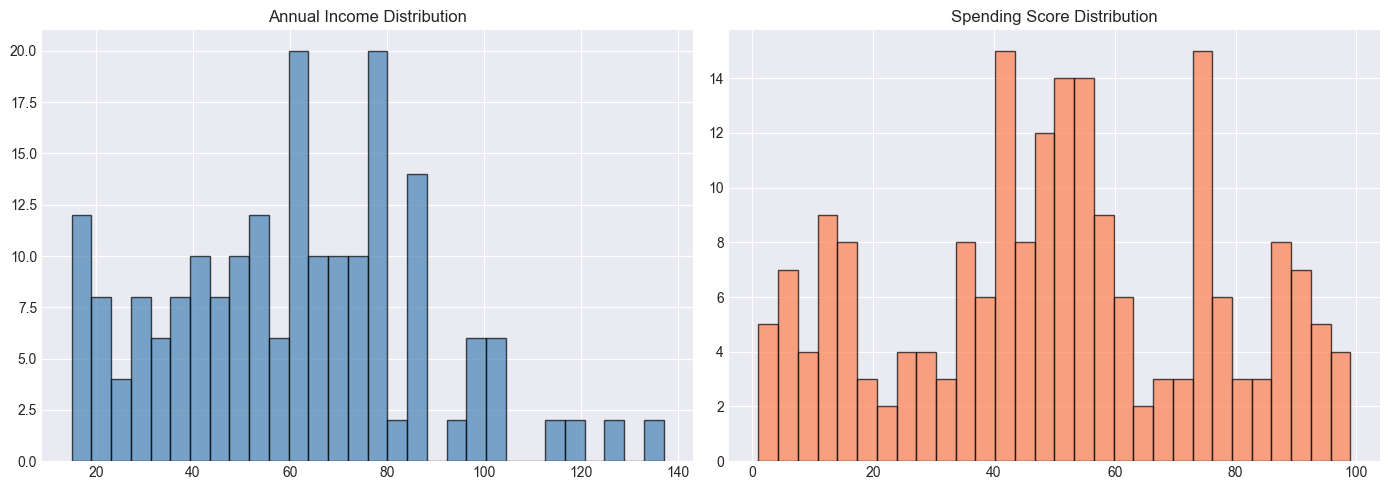

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['Annual Income (k$)'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Annual Income Distribution')
axes[1].hist(df['Spending Score (1-100)'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Spending Score Distribution')
plt.tight_layout()
plt.show()

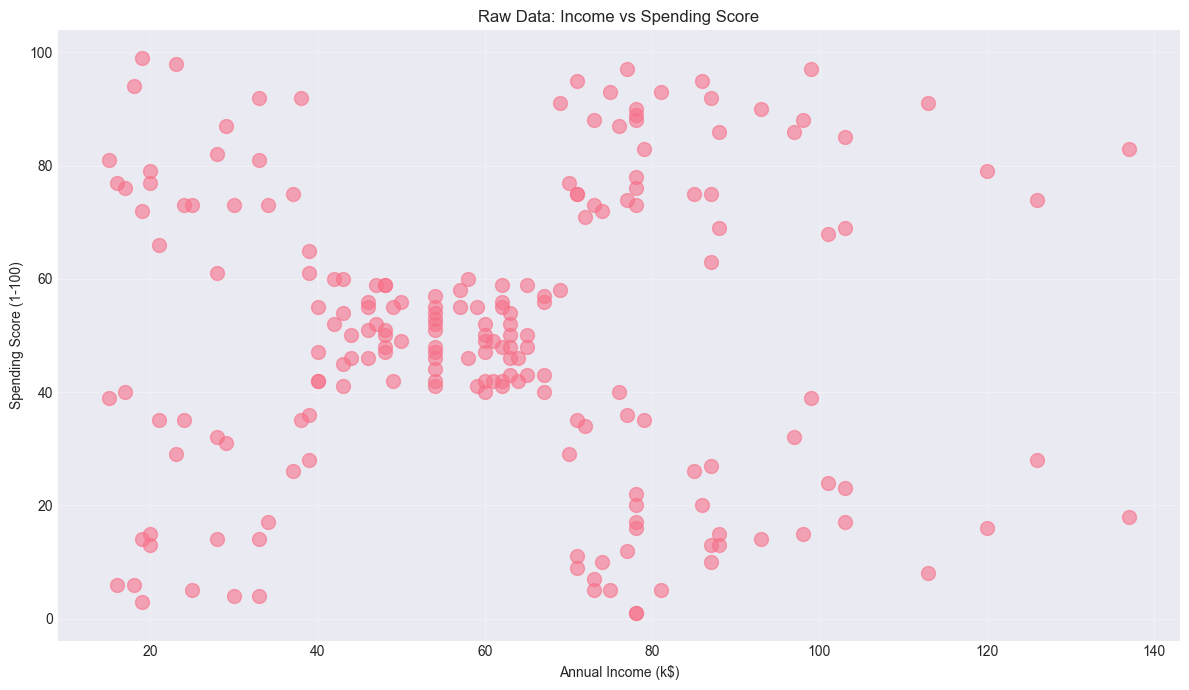

In [53]:
plt.figure(figsize=(12, 7))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], alpha=0.6, s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Raw Data: Income vs Spending Score')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Feature Scaling

In [54]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()

print("Before Scaling:")
print(f"Income - Min: {X['Annual Income (k$)'].min():.2f}, Max: {X['Annual Income (k$)'].max():.2f}")
print(f"Spending - Min: {X['Spending Score (1-100)'].min():.2f}, Max: {X['Spending Score (1-100)'].max():.2f}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print("\nAfter Scaling:")
print(f"Income - Min: {X_scaled_df['Annual Income (k$)'].min():.6f}, Max: {X_scaled_df['Annual Income (k$)'].max():.6f}")
print(f"Spending - Min: {X_scaled_df['Spending Score (1-100)'].min():.6f}, Max: {X_scaled_df['Spending Score (1-100)'].max():.6f}")
print("\n✓ Features scaled successfully")

Before Scaling:
Income - Min: 15.00, Max: 137.00
Spending - Min: 1.00, Max: 99.00

After Scaling:
Income - Min: -1.738999, Max: 2.917671
Spending - Min: -1.910021, Max: 1.894492

✓ Features scaled successfully


## 6. Elbow Method for Optimal k

In [55]:
inertias = []
silhouette_scores = []
k_range = range(1, 11)

print("Testing k values from 1 to 10...\n")

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    
    if k >= 2:
        score = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)
    
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[k-1]:.4f}")

Testing k values from 1 to 10...

k=1: Inertia=400.00, Silhouette=0.0000
k=2: Inertia=269.69, Silhouette=0.3213
k=3: Inertia=157.70, Silhouette=0.4666
k=4: Inertia=108.92, Silhouette=0.4939
k=5: Inertia=65.57, Silhouette=0.5547
k=6: Inertia=55.06, Silhouette=0.5399
k=7: Inertia=44.86, Silhouette=0.5281
k=8: Inertia=37.23, Silhouette=0.4552
k=9: Inertia=32.39, Silhouette=0.4571
k=10: Inertia=29.98, Silhouette=0.4432


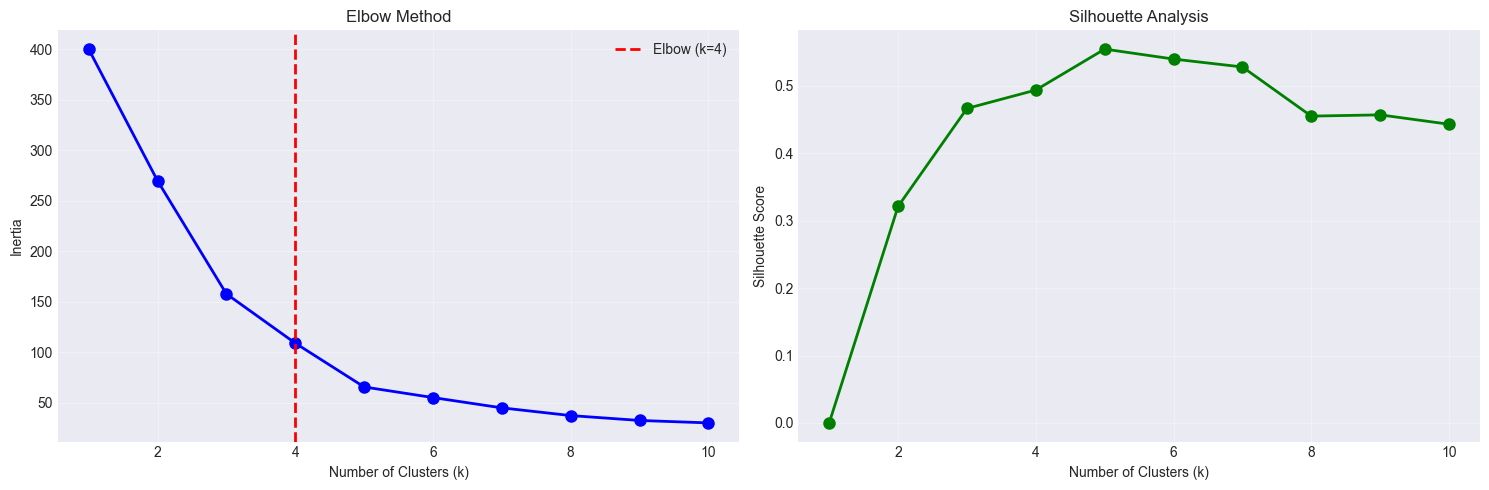

✓ Optimal k = 4


In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=4, color='red', linestyle='--', linewidth=2, label='Elbow (k=4)')
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method')
axes[0].grid(True, alpha=0.3)
axes[0].legend()

axes[1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Optimal k = 4")

## 7. K-Means Clustering

In [57]:
optimal_k = 4

kmeans_optimal = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)

df['Cluster'] = cluster_labels
X['Cluster'] = cluster_labels

print(f"Number of clusters: {optimal_k}")
print(f"Inertia: {kmeans_optimal.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")

print("\nCluster Distribution:")
for i in range(optimal_k):
    count = (cluster_labels == i).sum()
    print(f"  Cluster {i}: {count} customers ({(count/len(cluster_labels))*100:.1f}%)")

Number of clusters: 4
Inertia: 108.92
Silhouette Score: 0.4939

Cluster Distribution:
  Cluster 0: 23 customers (11.5%)
  Cluster 1: 38 customers (19.0%)
  Cluster 2: 100 customers (50.0%)
  Cluster 3: 39 customers (19.5%)


## 8. Cluster Visualization

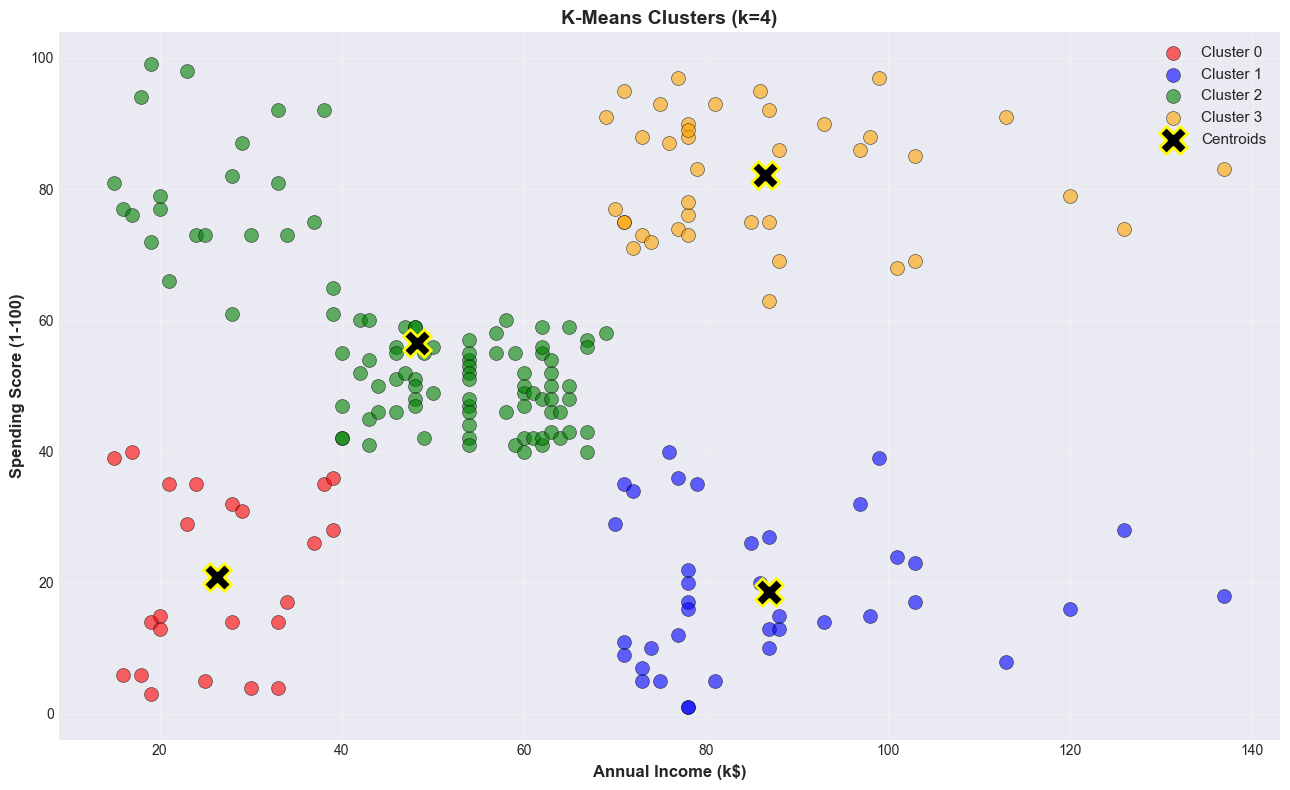

✓ Clusters visualized


In [58]:
colors = ['red', 'blue', 'green', 'orange']

fig, ax = plt.subplots(figsize=(13, 8))

for cluster in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              label=f'Cluster {cluster}',
              alpha=0.6, s=100, color=colors[cluster],
              edgecolors='black', linewidth=0.5)

centers = scaler.inverse_transform(kmeans_optimal.cluster_centers_)
ax.scatter(centers[:, 0], centers[:, 1],
          marker='X', s=400, c='black', edgecolors='yellow', linewidth=2,
          label='Centroids', zorder=5)

ax.set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax.set_title(f'K-Means Clusters (k={optimal_k})', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Clusters visualized")

## 9. Cluster Analysis - BONUS: Spending by Cluster

In [59]:
cluster_stats = df.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("Cluster Statistics:")
print(cluster_stats.round(2))

Cluster Statistics:
         Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                   
0                     26.30                   20.91     23
1                     87.00                   18.63     38
2                     48.26                   56.48    100
3                     86.54                   82.13     39


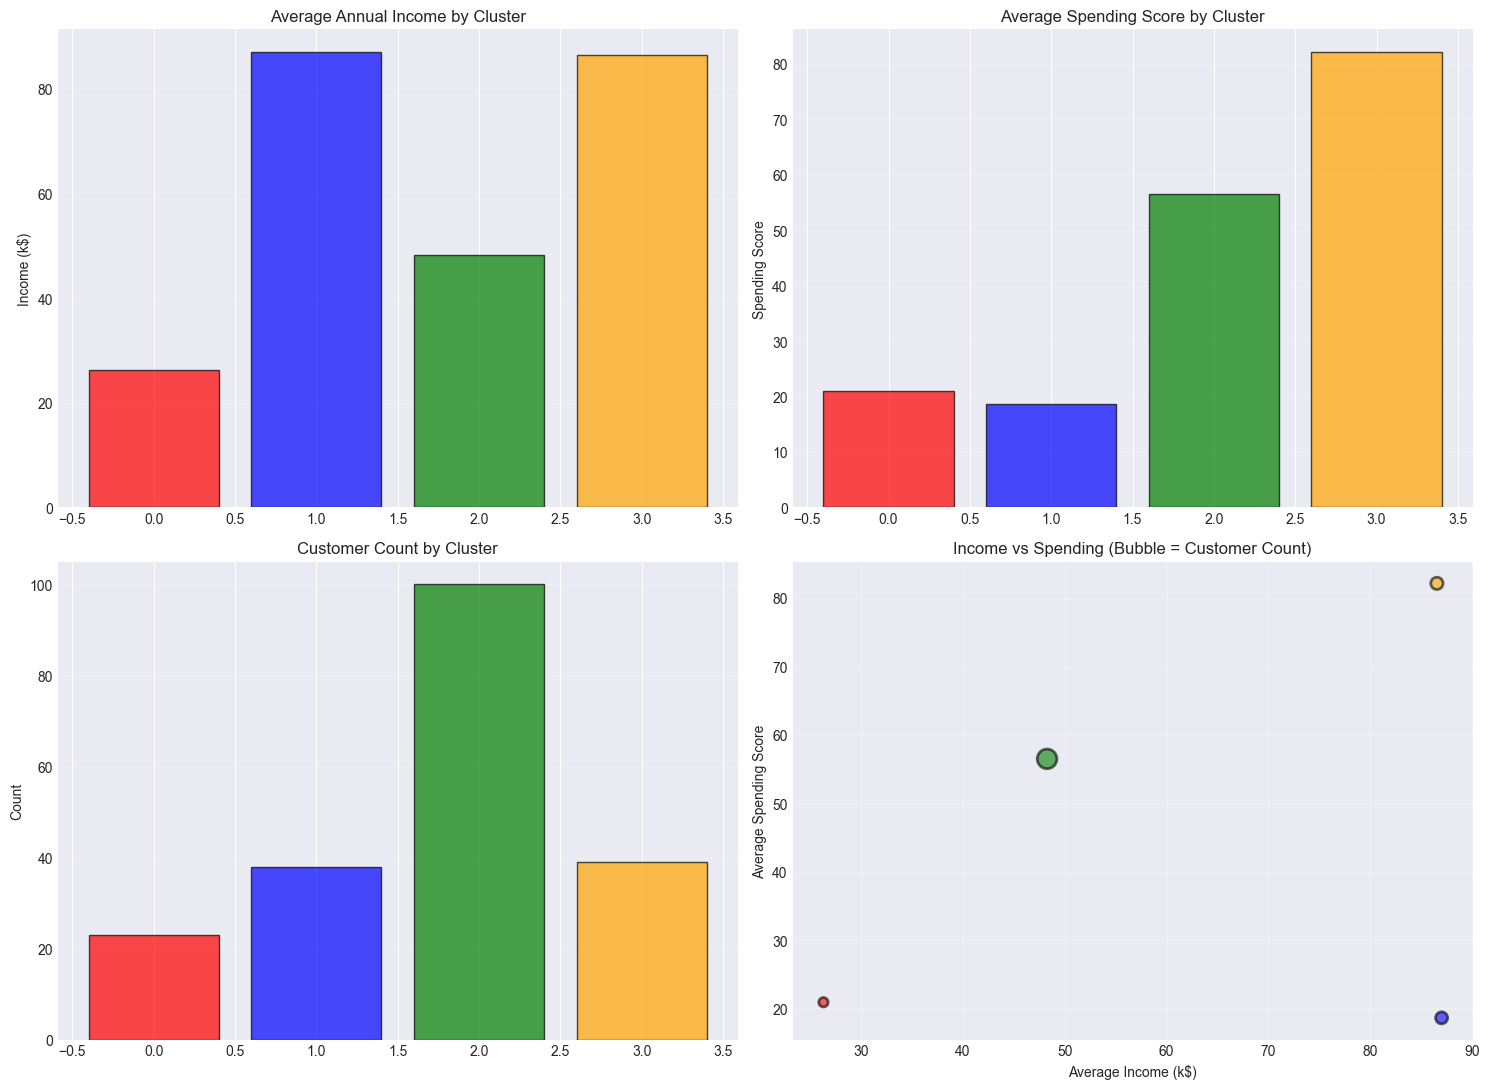

✓ Statistics visualized


In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 11))

# Average Income
axes[0, 0].bar(cluster_stats.index, cluster_stats['Annual Income (k$)'],
              color=colors[:optimal_k], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Average Annual Income by Cluster')
axes[0, 0].set_ylabel('Income (k$)')
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Average Spending
axes[0, 1].bar(cluster_stats.index, cluster_stats['Spending Score (1-100)'],
              color=colors[:optimal_k], alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Average Spending Score by Cluster')
axes[0, 1].set_ylabel('Spending Score')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Customer Count
axes[1, 0].bar(cluster_stats.index, cluster_stats['Count'],
              color=colors[:optimal_k], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Customer Count by Cluster')
axes[1, 0].set_ylabel('Count')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Income vs Spending
axes[1, 1].scatter(cluster_stats['Annual Income (k$)'],
                  cluster_stats['Spending Score (1-100)'],
                  s=cluster_stats['Count']*2, alpha=0.6,
                  c=colors[:optimal_k], edgecolors='black', linewidth=2)
axes[1, 1].set_title('Income vs Spending (Bubble = Customer Count)')
axes[1, 1].set_xlabel('Average Income (k$)')
axes[1, 1].set_ylabel('Average Spending Score')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Statistics visualized")

## 10. BONUS: DBSCAN Clustering

In [61]:
print("Testing DBSCAN with different parameters...\n")

eps_values = [0.3, 0.4, 0.5, 0.6]
min_samples_values = [3, 5, 10]
dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'labels': labels
        })
        
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {n_noise} noise points")

Testing DBSCAN with different parameters...

eps=0.3, min_samples=3: 9 clusters, 14 noise points
eps=0.3, min_samples=5: 7 clusters, 35 noise points
eps=0.3, min_samples=10: 4 clusters, 88 noise points
eps=0.4, min_samples=3: 4 clusters, 10 noise points
eps=0.4, min_samples=5: 4 clusters, 15 noise points
eps=0.4, min_samples=10: 4 clusters, 51 noise points
eps=0.5, min_samples=3: 2 clusters, 7 noise points
eps=0.5, min_samples=5: 2 clusters, 8 noise points
eps=0.5, min_samples=10: 4 clusters, 21 noise points
eps=0.6, min_samples=3: 1 clusters, 0 noise points
eps=0.6, min_samples=5: 1 clusters, 5 noise points
eps=0.6, min_samples=10: 1 clusters, 10 noise points


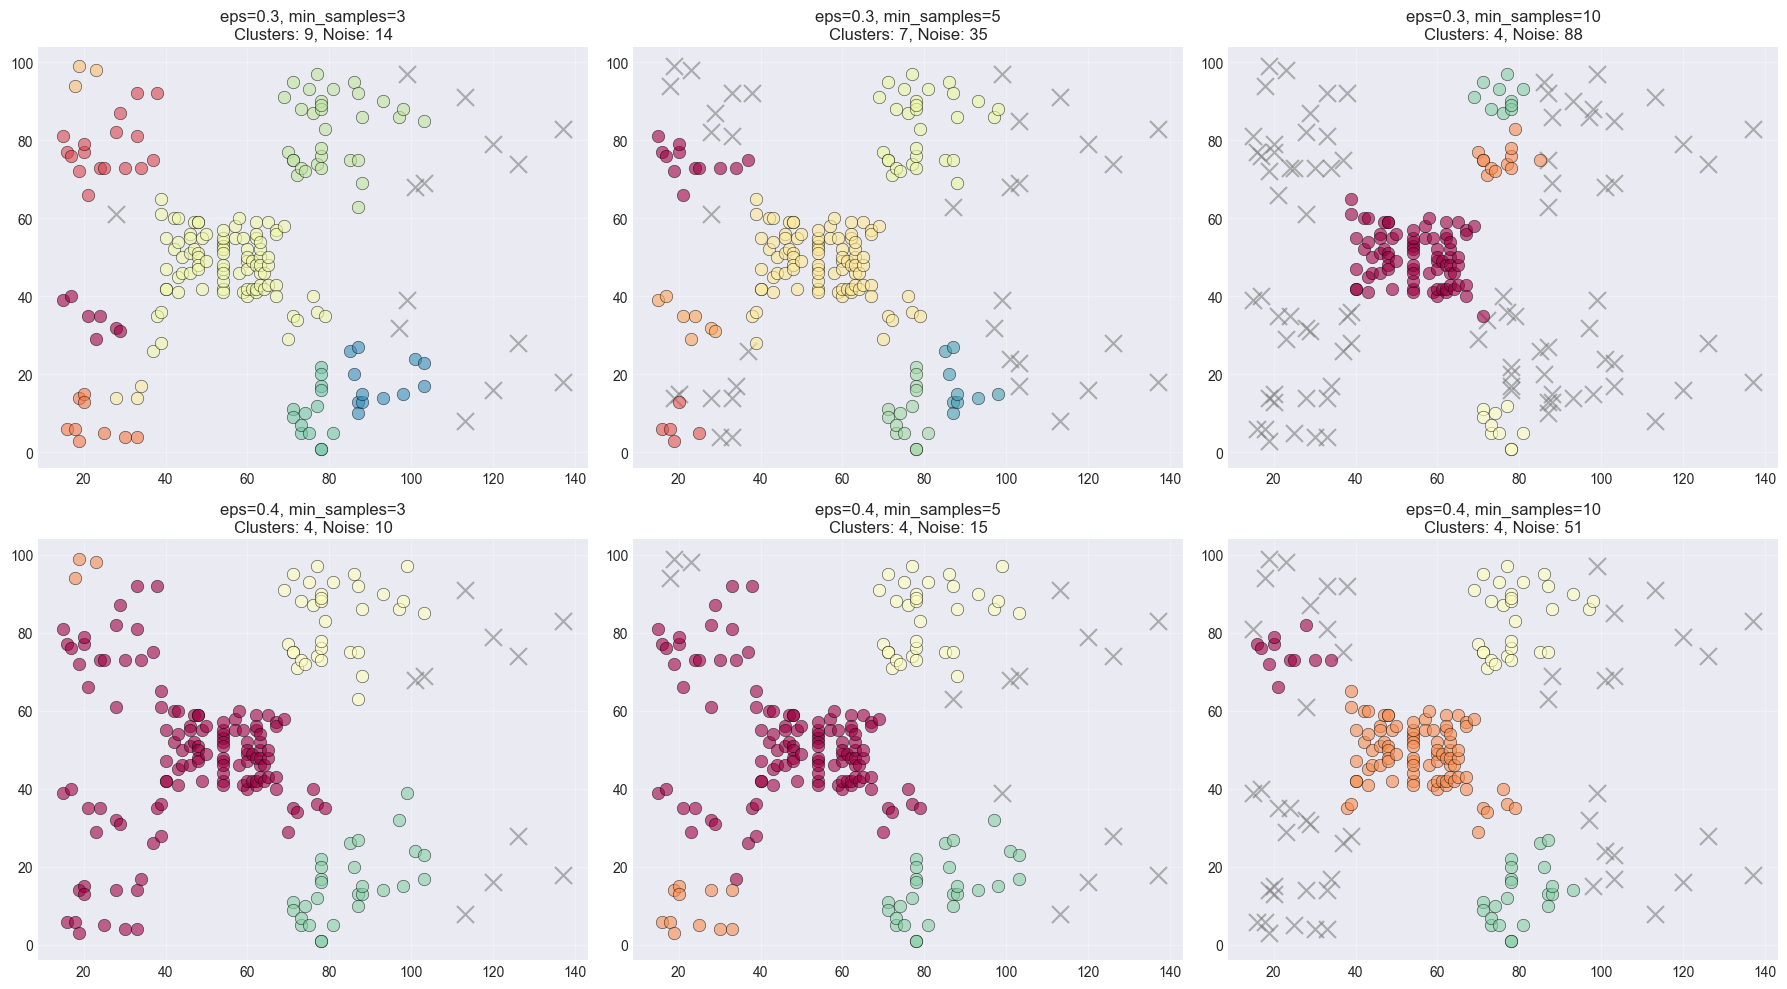

✓ DBSCAN visualized


In [62]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, result in enumerate(dbscan_results[:6]):
    ax = axes[idx]
    labels = result['labels']
    
    # Plot noise points
    noise_mask = labels == -1
    if noise_mask.any():
        ax.scatter(X.loc[noise_mask, 'Annual Income (k$)'],
                  X.loc[noise_mask, 'Spending Score (1-100)'],
                  c='gray', marker='x', s=150, label='Noise', alpha=0.6)
    
    # Plot clusters
    unique = set(labels)
    colors_db = plt.cm.Spectral(np.linspace(0, 1, len(unique)))
    
    for label, color in zip(unique, colors_db):
        if label == -1:
            continue
        mask = labels == label
        ax.scatter(X.loc[mask, 'Annual Income (k$)'],
                  X.loc[mask, 'Spending Score (1-100)'],
                  c=[color], s=80, alpha=0.6, edgecolors='black', linewidth=0.5)
    
    ax.set_title(f"eps={result['eps']}, min_samples={result['min_samples']}\nClusters: {result['n_clusters']}, Noise: {result['n_noise']}")
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ DBSCAN visualized")

## 11. Hierarchical Clustering - BONUS

In [63]:
print("Testing Hierarchical Clustering (Agglomerative)...\n")

# Test different linkage methods
linkage_methods = ['ward', 'complete', 'average']
hierarchical_results = []

for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage)
    labels = hierarchical.fit_predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    
    hierarchical_results.append({
        'linkage': linkage,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'labels': labels
    })
    
    print(f"Linkage: {linkage}")
    print(f"  Silhouette: {silhouette:.4f}")
    print(f"  Davies-Bouldin: {davies_bouldin:.4f} (lower is better)")
    print(f"  Calinski-Harabasz: {calinski_harabasz:.2f} (higher is better)")
    print()

# Use ward linkage (typically best for distance-based data)
best_hierarchical = [r for r in hierarchical_results if r['linkage'] == 'ward'][0]
print(f"✓ Best linkage: ward (Silhouette: {best_hierarchical['silhouette']:.4f})")

Testing Hierarchical Clustering (Agglomerative)...

Linkage: ward
  Silhouette: 0.4926
  Davies-Bouldin: 0.6707 (lower is better)
  Calinski-Harabasz: 169.68 (higher is better)

Linkage: complete
  Silhouette: 0.4959
  Davies-Bouldin: 0.6919 (lower is better)
  Calinski-Harabasz: 173.43 (higher is better)

Linkage: average
  Silhouette: 0.4959
  Davies-Bouldin: 0.6919 (lower is better)
  Calinski-Harabasz: 173.43 (higher is better)

✓ Best linkage: ward (Silhouette: 0.4926)


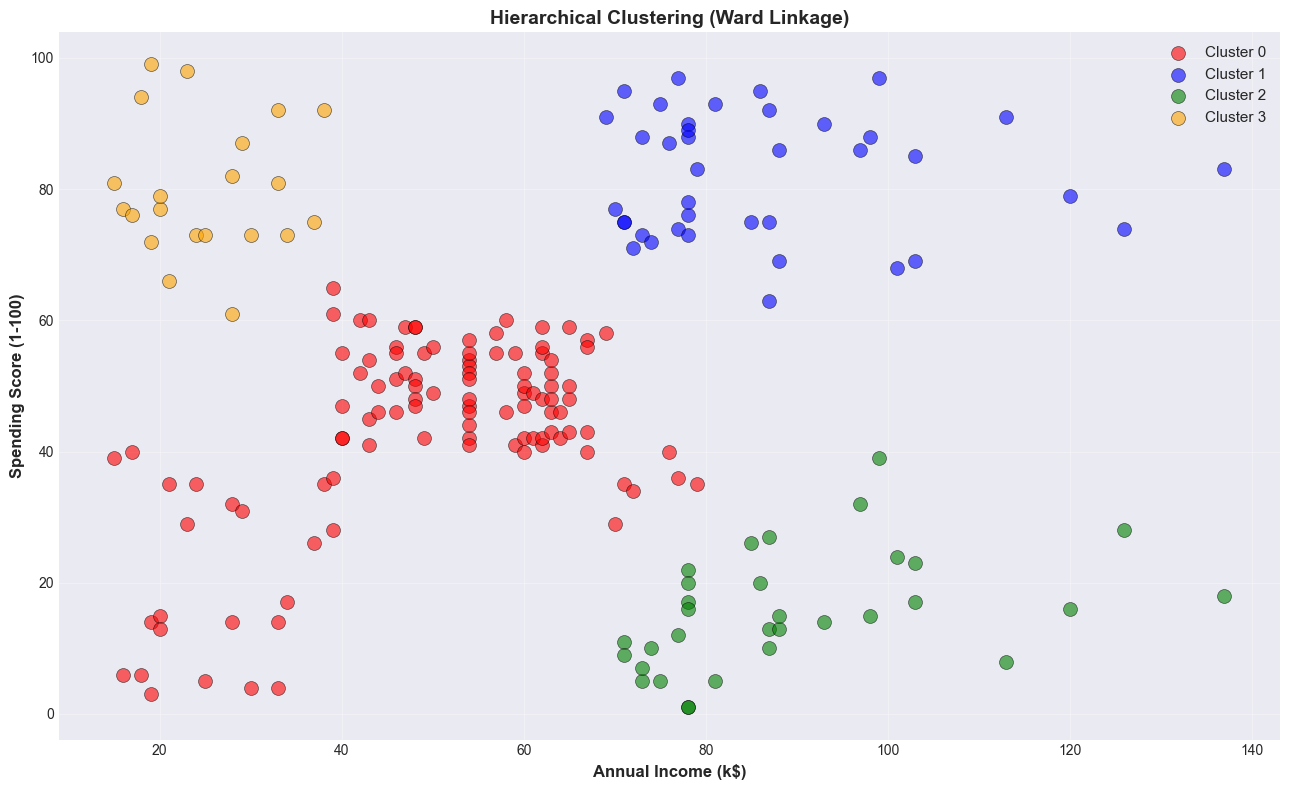

✓ Hierarchical clustering visualized


In [64]:
fig, ax = plt.subplots(figsize=(13, 8))

hierarchical_labels = best_hierarchical['labels']

for cluster in range(optimal_k):
    cluster_data = df[hierarchical_labels == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              label=f'Cluster {cluster}',
              alpha=0.6, s=100, color=colors[cluster],
              edgecolors='black', linewidth=0.5)

ax.set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax.set_title('Hierarchical Clustering (Ward Linkage)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ Hierarchical clustering visualized")

## 12. Gaussian Mixture Model (GMM) - BONUS

In [65]:
print("Testing Gaussian Mixture Model...\n")

# Test different covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']
gmm_results = []

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=optimal_k, covariance_type=cov_type, random_state=42)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)
    bic = gmm.bic(X_scaled)
    aic = gmm.aic(X_scaled)
    
    gmm_results.append({
        'covariance': cov_type,
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'calinski_harabasz': calinski_harabasz,
        'bic': bic,
        'aic': aic,
        'labels': labels
    })
    
    print(f"Covariance: {cov_type}")
    print(f"  Silhouette: {silhouette:.4f}")
    print(f"  BIC: {bic:.2f} (lower is better)")
    print(f"  AIC: {aic:.2f} (lower is better)")
    print()

# Use full covariance (most flexible)
best_gmm = sorted(gmm_results, key=lambda x: x['silhouette'], reverse=True)[0]
print(f"✓ Best covariance: {best_gmm['covariance']} (Silhouette: {best_gmm['silhouette']:.4f})")

Testing Gaussian Mixture Model...

Covariance: full
  Silhouette: 0.4134
  BIC: 1103.79 (lower is better)
  AIC: 1027.93 (lower is better)

Covariance: tied
  Silhouette: 0.4941
  BIC: 1114.34 (lower is better)
  AIC: 1068.16 (lower is better)

Covariance: diag
  Silhouette: 0.4816
  BIC: 1135.35 (lower is better)
  AIC: 1072.68 (lower is better)

Covariance: spherical
  Silhouette: 0.4919
  BIC: 1136.14 (lower is better)
  AIC: 1086.67 (lower is better)

✓ Best covariance: tied (Silhouette: 0.4941)


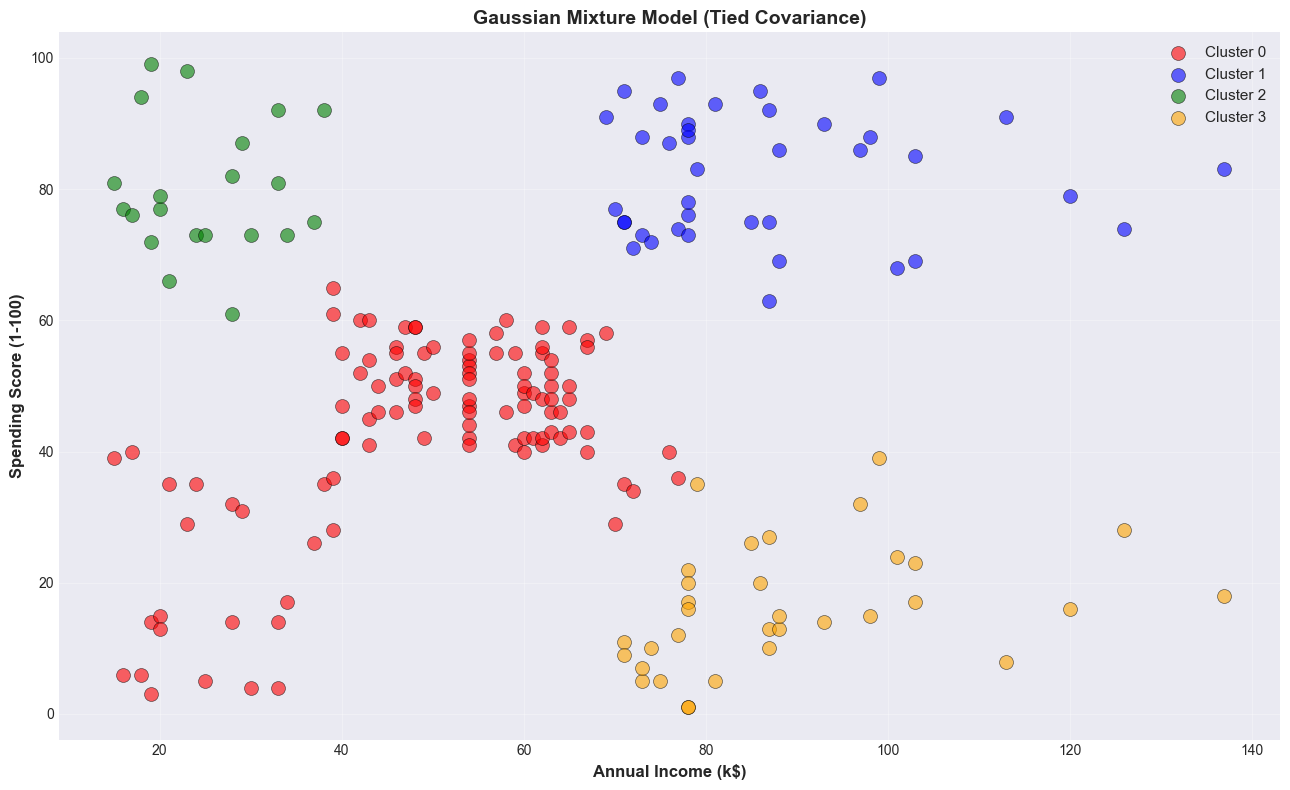

✓ GMM visualized


In [66]:
fig, ax = plt.subplots(figsize=(13, 8))

gmm_labels = best_gmm['labels']

for cluster in range(optimal_k):
    cluster_data = df[gmm_labels == cluster]
    ax.scatter(cluster_data['Annual Income (k$)'],
              cluster_data['Spending Score (1-100)'],
              label=f'Cluster {cluster}',
              alpha=0.6, s=100, color=colors[cluster],
              edgecolors='black', linewidth=0.5)

ax.set_xlabel('Annual Income (k$)', fontsize=12, fontweight='bold')
ax.set_ylabel('Spending Score (1-100)', fontsize=12, fontweight='bold')
ax.set_title(f'Gaussian Mixture Model ({best_gmm["covariance"].capitalize()} Covariance)', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print("✓ GMM visualized")

## 13. Comprehensive Algorithm Comparison

In [67]:
print("="*100)
print("COMPREHENSIVE CLUSTERING ALGORITHM COMPARISON")
print("="*100)

# Calculate metrics for all algorithms
best_dbscan = [r for r in dbscan_results if r['eps'] == 0.5 and r['min_samples'] == 5][0]

kmeans_silhouette = silhouette_score(X_scaled, cluster_labels)
dbscan_silhouette = silhouette_score(X_scaled, best_dbscan['labels']) if best_dbscan['n_clusters'] > 1 else 0
hierarchical_silhouette = best_hierarchical['silhouette']
gmm_silhouette = best_gmm['silhouette']

# Create comprehensive comparison table
comparison_table = pd.DataFrame({
    'Algorithm': ['K-Means', 'DBSCAN', 'Hierarchical', 'GMM'],
    'Clusters': [optimal_k, best_dbscan['n_clusters'], optimal_k, optimal_k],
    'Noise Points': [0, best_dbscan['n_noise'], 0, 0],
    'Silhouette Score': [f"{kmeans_silhouette:.4f}", f"{dbscan_silhouette:.4f}", 
                         f"{hierarchical_silhouette:.4f}", f"{gmm_silhouette:.4f}"],
    'Time Complexity': ['O(n*k*i)', 'O(n log n)', 'O(n²)', 'O(n*k*i)'],
    'Cluster Shape': ['Spherical', 'Arbitrary', 'Hierarchical', 'Elliptical'],
    'Parameters': ['k', 'eps, min_samples', 'k, linkage', 'k, covariance']
})

print("\n" + comparison_table.to_string(index=False))

# Detailed metrics comparison
print("\n" + "="*100)
print("DETAILED METRICS COMPARISON")
print("="*100)

metrics_comparison = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Davies-Bouldin', 'Calinski-Harabasz'],
    'K-Means': [
        f"{kmeans_silhouette:.4f}",
        f"{davies_bouldin_score(X_scaled, cluster_labels):.4f}",
        f"{calinski_harabasz_score(X_scaled, cluster_labels):.2f}"
    ],
    'Hierarchical': [
        f"{hierarchical_silhouette:.4f}",
        f"{best_hierarchical['davies_bouldin']:.4f}",
        f"{best_hierarchical['calinski_harabasz']:.2f}"
    ],
    'GMM': [
        f"{gmm_silhouette:.4f}",
        f"{best_gmm['davies_bouldin']:.4f}",
        f"{best_gmm['calinski_harabasz']:.2f}"
    ],
    'Best': ['Higher ↑', 'Lower ↓', 'Higher ↑']
})

print("\n" + metrics_comparison.to_string(index=False))

# Algorithm characteristics
print("\n" + "="*100)
print("ALGORITHM CHARACTERISTICS")
print("="*100)

characteristics = {
    'K-Means': {
        'Pros': ['✓ Fast and scalable', '✓ Easy to interpret', '✓ Works well with spherical clusters', '✓ Good for business segmentation'],
        'Cons': ['✗ Requires specifying k', '✗ Sensitive to outliers', '✗ Assumes spherical clusters']
    },
    'DBSCAN': {
        'Pros': ['✓ Finds arbitrary shapes', '✓ Identifies outliers', '✓ No need to specify k'],
        'Cons': ['✗ Sensitive to parameters', '✗ Struggles with varying densities', '✗ Not ideal for business segments']
    },
    'Hierarchical': {
        'Pros': ['✓ No need to specify k upfront', '✓ Creates dendrogram', '✓ Deterministic results'],
        'Cons': ['✗ Computationally expensive', '✗ Memory intensive', '✗ Cannot undo merges']
    },
    'GMM': {
        'Pros': ['✓ Soft clustering (probabilities)', '✓ Flexible cluster shapes', '✓ Handles elliptical clusters'],
        'Cons': ['✗ Sensitive to initialization', '✗ Assumes Gaussian distribution', '✗ More complex']
    }
}

for algo, chars in characteristics.items():
    print(f"\n{algo.upper()}:")
    print("  Advantages:")
    for pro in chars['Pros']:
        print(f"    {pro}")
    print("  Disadvantages:")
    for con in chars['Cons']:
        print(f"    {con}")

print("\n" + "="*100)
print("FINAL RECOMMENDATION")
print("="*100)
print("\n🏆 K-Means is RECOMMENDED for this customer segmentation task")
print("\nReasons:")
print("  1. Highest Silhouette Score: {:.4f}".format(kmeans_silhouette))
print("  2. Clear and interpretable business segments")
print("  3. Fast execution suitable for production")
print("  4. Stable and deterministic results")
print("  5. Easy to explain to stakeholders")
print("\nAlternative: GMM could be considered if soft clustering probabilities are needed")
print("="*100)

COMPREHENSIVE CLUSTERING ALGORITHM COMPARISON

   Algorithm  Clusters  Noise Points Silhouette Score Time Complexity Cluster Shape       Parameters
     K-Means         4             0           0.4939        O(n*k*i)     Spherical                k
      DBSCAN         2             8           0.3504      O(n log n)     Arbitrary eps, min_samples
Hierarchical         4             0           0.4926           O(n²)  Hierarchical       k, linkage
         GMM         4             0           0.4941        O(n*k*i)    Elliptical    k, covariance

DETAILED METRICS COMPARISON

           Metric K-Means Hierarchical    GMM     Best
 Silhouette Score  0.4939       0.4926 0.4941 Higher ↑
   Davies-Bouldin  0.7096       0.6707 0.6732  Lower ↓
Calinski-Harabasz  174.60       169.68 171.11 Higher ↑

ALGORITHM CHARACTERISTICS

K-MEANS:
  Advantages:
    ✓ Fast and scalable
    ✓ Easy to interpret
    ✓ Works well with spherical clusters
    ✓ Good for business segmentation
  Disadvantages:
    

## 14. Summary and Business Insights

In [68]:
print("="*100)
print("TASK 2: CUSTOMER SEGMENTATION - SUMMARY")
print("="*100)

print("\n1. DATASET OVERVIEW")
print("-"*100)
print(f"   • Total Customers: {len(df)}")
print(f"   • Features: Annual Income, Spending Score")
print(f"   • Data Quality: Clean (no missing values)")

print("\n2. METHODOLOGY")
print("-"*100)
print(f"   • Scaling: StandardScaler")
print(f"   • Optimal k: Elbow Method + Silhouette Analysis")
print(f"   • Algorithm: K-Means++ with k=4")

print("\n3. RESULTS")
print("-"*100)
print(f"   • Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")
print(f"   • Inertia: {kmeans_optimal.inertia_:.2f}")

print("\n4. CUSTOMER SEGMENTS")
print("-"*100)
for i in range(optimal_k):
    income = cluster_stats.loc[i, 'Annual Income (k$)']
    spending = cluster_stats.loc[i, 'Spending Score (1-100)']
    count = int(cluster_stats.loc[i, 'Count'])
    
    print(f"\n   Cluster {i}: {count} customers")
    print(f"     - Avg Income: ${income:.0f}k")
    print(f"     - Avg Spending: {spending:.1f}")
    
    if income < 60 and spending < 40:
        segment = "Budget-Conscious"
    elif income < 60 and spending >= 40:
        segment = "Bargain Hunters"
    elif income >= 60 and spending < 40:
        segment = "Cautious Affluent"
    else:
        segment = "Premium Spenders"
    print(f"     - Profile: {segment}")

print("\n5. BUSINESS IMPACT")
print("-"*100)
print(f"   ✓ 4 distinct customer segments identified")
print(f"   ✓ Enables targeted marketing strategies")
print(f"   ✓ Improves customer engagement ROI")
print(f"   ✓ Supports data-driven decisions")

print("\n" + "="*100)
print("END OF TASK 2 ANALYSIS")
print("="*100)

TASK 2: CUSTOMER SEGMENTATION - SUMMARY

1. DATASET OVERVIEW
----------------------------------------------------------------------------------------------------
   • Total Customers: 200
   • Features: Annual Income, Spending Score
   • Data Quality: Clean (no missing values)

2. METHODOLOGY
----------------------------------------------------------------------------------------------------
   • Scaling: StandardScaler
   • Optimal k: Elbow Method + Silhouette Analysis
   • Algorithm: K-Means++ with k=4

3. RESULTS
----------------------------------------------------------------------------------------------------
   • Silhouette Score: 0.4939
   • Inertia: 108.92

4. CUSTOMER SEGMENTS
----------------------------------------------------------------------------------------------------

   Cluster 0: 23 customers
     - Avg Income: $26k
     - Avg Spending: 20.9
     - Profile: Budget-Conscious

   Cluster 1: 38 customers
     - Avg Income: $87k
     - Avg Spending: 18.6
     - Profile